# Spotify Classification: predict the top genre that a song belongs to.  

This dataset includes these features:  
**Id**: unique track identifier.  
**title**: track title.  
**artist**: singer or band.  
**year**:  year of release (or re-release).  
**bpm**:  beats per minute.  
**nrgy**:  energy: higher, more energetic.  
**dnce**: danceability: higher, the easier to dance to.  
**dB**:  loudness (dB): the higher the value, the louder the song.  
**live**: liveness: higher, more likely it's a live recording.  
**val**: valence: higher, more positive mood.  
**dur**: duration: song length.  
**acous**: acousticness: higher, more acoustic.  
**spch**: speechiness: higher, more spoken word.  
**pop**:  popularity: higher is more popular.  
**top genre**:  genre of the track (class label).  


# 1. Importing dataset and libraries

In [1]:
import pandas as pd
import numpy as np


# plotting
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
# default is 120 seconds
%autosave 60  

Autosaving every 60 seconds


## 1.1.Load the data
Load the train and test data:
the train data will be split into train and validation sets for hyperparameter tuning and to select the best model. 
The best model will be trained on the entire training set
and the trained model will make prediction on the test set.

In [3]:
train_set=pd.read_csv("CS98XClassificationTrain.csv")
test_set=pd.read_csv("CS98XClassificationTest.csv")

Removing ID and song titles

In [4]:
train_set = train_set.drop(columns=['Id','title', 'artist'])
test_set = test_set.drop(columns=['Id','title', 'artist'])

In [5]:
#set to True for data visualization and verbose text output 
verbose=True  

In [6]:
train_set.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top genre
0,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [7]:
# summary of numerical features
train_set.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000
mean,1991.443709,118.399558,60.070640,59.565121,-8.836645,17.757174,59.465784,226.278146,32.982340,5.660044,60.743929
std,16.776103,25.238713,22.205284,15.484458,3.577187,13.830300,24.539868,63.770380,29.530015,5.550581,13.470083
min,1948.000000,62.000000,7.000000,18.000000,-24.000000,2.000000,6.000000,98.000000,0.000000,2.000000,26.000000
25%,1976.000000,100.000000,43.000000,49.000000,-11.000000,9.000000,42.000000,181.000000,7.000000,3.000000,53.000000
50%,1994.000000,119.000000,63.000000,61.000000,-8.000000,13.000000,61.000000,223.000000,24.000000,4.000000,63.000000
75%,2007.000000,133.000000,78.000000,70.000000,-6.000000,23.000000,80.000000,262.000000,58.000000,6.000000,71.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,93.000000,99.000000,511.000000,100.000000,47.000000,84.000000


In [8]:
# feature names and their counts, Non-Null counts should be equal.
# top genre is the target (class) and has missing values (453-438)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       453 non-null    int64 
 1   bpm        453 non-null    int64 
 2   nrgy       453 non-null    int64 
 3   dnce       453 non-null    int64 
 4   dB         453 non-null    int64 
 5   live       453 non-null    int64 
 6   val        453 non-null    int64 
 7   dur        453 non-null    int64 
 8   acous      453 non-null    int64 
 9   spch       453 non-null    int64 
 10  pop        453 non-null    int64 
 11  top genre  438 non-null    object
dtypes: int64(11), object(1)
memory usage: 42.6+ KB


# 2. Data cleaning and exploration

## 2.1. Remove duplicate

In [9]:
train_set = train_set.drop_duplicates()
len(train_set)

452

## 2.2. Checking outliers

C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future 

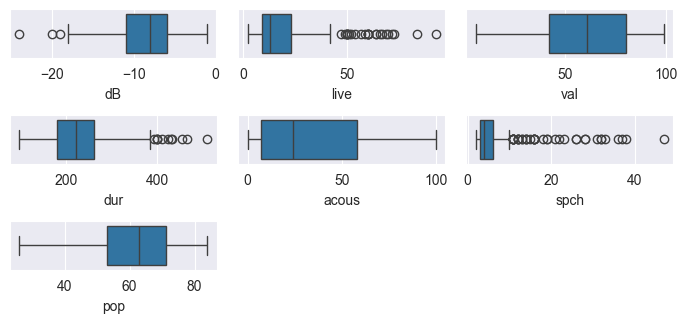

In [10]:
# boxplots: visualize data distributions and outliers
if verbose:
  plt.figure(figsize=(7,5));
  df=train_set.drop("top genre", axis=1, inplace=False)
  attributes=df.columns.values.tolist()
  idx=4
  for attribute in attributes[idx:]:
    plt.subplot(5,3,idx)
    sns.boxplot(x=train_set[attribute])
    idx=idx+1
  plt.tight_layout(pad=1)
  plt.show()

We see that quite a few outliers are presented in multiple features like "spch", "dur", "live". As we are working with a relatively small dataset, dropping all these rows can cause us precious data, so instead we will change the numeric value of the features into its equivalent percentile 

In [11]:
train_set.rename(columns={'top genre': 'top_genre'}, inplace=True)
train_set.head()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre
0,1996,107,31,45,-8,13,28,150,75,3,44,adult standards
1,2011,114,44,53,-8,13,47,139,49,3,37,NaN
2,1979,105,36,63,-9,13,67,245,11,3,77,adult standards
3,1980,170,28,47,-16,13,33,232,25,3,67,adult standards
4,1973,121,47,56,-8,15,40,193,45,3,63,glam rock


In [12]:
test_set['top_genre'] = 'testing'

# Concatenate the train and test dataset into 1 for outliers conversion

df_concat = pd.concat([train_set, test_set], ignore_index=True)

In [13]:
# Function to calculate percentile values
def calculate_percentiles(df, col_list):
    for col in col_list:
        df[col] = df[col].rank(pct=True)
    return df
# Calculate percentiles for the column
outliers_col = ['live','dur', 'spch']
df_concat = calculate_percentiles(df_concat, outliers_col)

In [14]:
df_concat.describe()

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000
mean,1991.249558,119.339823,60.290265,59.465487,-8.846018,0.500885,59.286726,0.500885,32.557522,0.500885,61.111504
std,16.725878,25.408114,22.357365,15.400365,3.648473,0.288644,24.480255,0.288921,29.605964,0.277469,13.200310
min,1945.000000,62.000000,6.000000,18.000000,-24.000000,0.002655,6.000000,0.001770,0.000000,0.008850,26.000000
25%,1976.000000,102.000000,43.000000,50.000000,-11.000000,0.233628,40.000000,0.252212,6.000000,0.216814,54.000000
50%,1993.000000,120.000000,63.000000,60.000000,-8.000000,0.500000,61.000000,0.498230,23.000000,0.533628,64.000000
75%,2007.000000,134.000000,79.000000,70.000000,-6.000000,0.760177,80.000000,0.754867,57.000000,0.769027,71.000000
max,2019.000000,199.000000,100.000000,96.000000,-1.000000,1.000000,99.000000,1.000000,100.000000,0.999115,84.000000


## 2.3. Features engineering

In [15]:
# With the year range so long, ranging from 1948 to 2019, we can group the years into group of 5:

def assign_group(year):
    if 1948 <= year <= 1954:
        return 1
    else: 
        return ((year - 1954)//5)+2
    
# Apply the calculation

df_concat['year'] = df_concat['year'].apply(assign_group)

In [16]:
df_concat

,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_genre
0,10,107,31,45,-8,0.500000,28,0.117699,75,0.216814,44,adult standards
1,13,114,44,53,-8,0.500000,47,0.059292,49,0.216814,37,NaN
2,7,105,36,63,-9,0.500000,67,0.651327,11,0.216814,77,adult standards
3,7,170,28,47,-16,0.500000,33,0.576991,25,0.216814,67,adult standards
4,5,121,47,56,-8,0.585841,40,0.302655,45,0.216814,63,glam rock
...,...,...,...,...,...,...,...,...,...,...,...,...
560,12,125,57,61,-8,0.923894,76,0.396460,3,0.999115,78,testing
561,13,130,89,67,-6,0.303540,80,0.451327,4,0.216814,44,testing
562,10,84,58,78,-7,0.551327,76,0.702655,43,0.978761,74,testing
563,6,127,97,72,-5,0.439823,73,0.852212,6,0.935398,71,testing


In [17]:
testing = df_concat[df_concat['top_genre'] == 'testing']
training = df_concat[df_concat['top_genre'] != 'testing']

# 4 Preparing the data to train with the model

In [18]:
# Apply SMOTE to avoid imbalance dataset

In [19]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [59]:
# Dropping genre with only 1 single sample
value_counts=training["top_genre"].value_counts()

drop_genre = value_counts[value_counts == 1].index.tolist()
training = training[~training['top_genre'].isin(drop_genre)]

In [60]:
X = training.drop('top_genre', axis = 1)
y = training['top_genre']

In [61]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [65]:
'''
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='auto', random_state=42,k_neighbors=2)
X_resampled, y_resampled = smote.fit_resample(X, y_encoded)

'''

ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 3, n_samples_fit = 2, n_samples = 2

In [69]:
# Scale the dataset
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
X_scaled = robust_scaler.fit_transform(X)

# 5. Try multiple model for prediction

## XGBoost

In [67]:
pip install xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 330.3 kB/s eta 0:05:02
   ---------------------------------------- 0.1/99.8 MB 1.8 MB/s eta 0:00:56
   ---------------------------------------- 0.5/99.8 MB 4.4 MB/s eta 0:00:23
   ---------------------------------------- 1.1/99.8 MB 7.2 MB/s eta 0:00:14
    --------------------------------------- 1.9/99.8 MB 9.9 MB/s eta 0:00:10
   - -------------------------------------- 2.6/99.8 MB 11.2 MB/s eta 0:00:09
   - -------------------------------------- 3.5/99.8 MB 13.0 MB/s eta 0:00:08
   - -------------------------------------- 4.3/99.8 MB 13.8 MB/s eta 0:00:07
   -- ------------------------------------- 5.2/99.8 MB 14.3 MB/s eta 0:00:07
   -- ------------------------------------- 6.0/99.8 MB 14.8 MB/s eta 0:00:07
   -- ------------------------------------- 6.8/99.8 MB 15.5 MB/s eta 0:00:06
   --- ------------------------------------ 7.7/99.8 MB 16.4 MB/s eta 0:00:

In [70]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, stratify=y_encoded, random_state=42
)

In [72]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_cl = xgb.XGBClassifier()


# Init classifier
xgb_cl = xgb.XGBClassifier()

# Fit
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.23300970873786409

In [76]:
param_grid = {
    "max_depth": [3, 4, 5, 7],
    "learning_rate": [0.1, 0.01, 0.05],
    "gamma": [0, 0.25, 1],
    "reg_lambda": [0, 1, 10],
    "scale_pos_weight": [1, 3, 5],
    "subsample": [0.8],
    "colsample_bytree": [0.5],
}

In [77]:
from sklearn.model_selection import GridSearchCV

# Init classifier
xgb_cl = xgb.XGBClassifier(objective="multi:softprob:logistic")

# Init Grid Search
grid_cv = GridSearchCV(xgb_cl, param_grid, n_jobs=-1, cv=3, scoring="accuracy")

# Fit
_ = grid_cv.fit(X_scaled, y_encoded)

C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:50:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [79]:
grid_cv.best_score_

0.38592686625057304

In [80]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

In [81]:
# Insert the new fixed values to the grid
param_grid["scale_pos_weight"] = [3]
param_grid["subsample"] = [0.8]
param_grid["colsample_bytree"] = [0.5]

# Give new value ranges to other params
param_grid["gamma"] = [3, 5, 7]
param_grid["max_depth"] = [9, 15, 20]
param_grid["reg_lambda"] = [10, 30, 50]
param_grid["learning_rate"] = [0.3, 0.5, 0.7, 1]

In [83]:
grid_cv_2 = GridSearchCV(xgb_cl, param_grid, 
                         cv=3, scoring="accuracy", n_jobs=-1)

_ = grid_cv_2.fit(X_scaled, y_encoded)

C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=3.
  warnings.warn(
C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py:160: UserWarning: [07:55:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "scale_pos_weight" } are not used.

  warnings.warn(smsg, UserWarning)


In [84]:
grid_cv_2.best_score_

0.349483409147008

In [85]:
grid_cv.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0,
 'learning_rate': 0.01,
 'max_depth': 3,
 'reg_lambda': 0,
 'scale_pos_weight': 1,
 'subsample': 0.8}

## Randomforest

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

rf_clf = RandomForestClassifier(random_state=42)

# define a range of  values to search over
#
# param_grid = {'n_estimators': [50, 100, 200, 400, 800]}  # 400 best

max_depth_vec=np.arange(1,16,1)
param_grid = {'max_depth': max_depth_vec}

# perform a grid search over the n_estimators values
grid_search = GridSearchCV(rf_clf, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_scaled, y_encoded)

# Get the best hyperparameters
best_params = grid_search.best_params_
best_score=grid_search.best_score_

mean_train = grid_search.cv_results_['mean_train_score']
mean_val   = grid_search.cv_results_['mean_test_score']
print("mean weighted train scores={}".format(mean_train))
print("mean weighted validation scores={}".format(mean_val))

# print the best n_estimators value and corresponding score
print("Best max_depth: {}".format(best_params['max_depth']))
print("Best validation score: {:.2f}%".format(best_score*100))


C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


mean weighted train scores=[0.36953855 0.3822824  0.41201437 0.44538454 0.5315391  0.63955236
 0.79305517 0.90653588 0.964189   0.98786037 0.9993921  1.
 1.         1.         1.        ]
mean weighted validation scores=[0.36159271 0.35915369 0.37123127 0.38098736 0.38104614 0.37375845
 0.36893917 0.36641199 0.37126065 0.35915369 0.35674405 0.35924185
 0.35674405 0.351866   0.3446077 ]
Best max_depth: 5
Best validation score: 38.10%


In [88]:
RFC_model = RandomForestClassifier(n_estimators=400, max_depth=14, random_state=42)
RFC_model.fit(X_scaled, y_encoded)

RandomForestClassifier(max_depth=14, n_estimators=400, random_state=42)

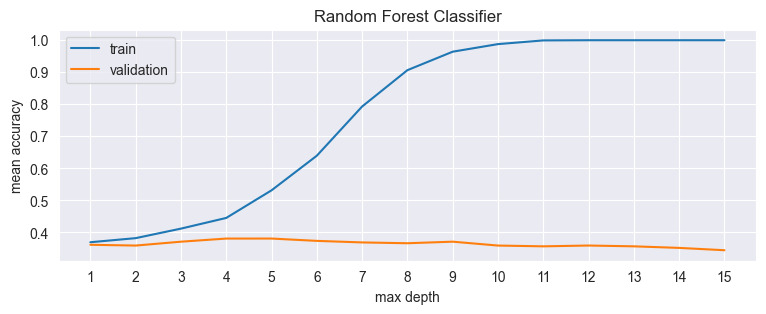

In [89]:
fig=plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
plt.plot(max_depth_vec, mean_train, label="train")
plt.plot(max_depth_vec, mean_val, label="validation")
plt.title("Random Forest Classifier")
plt.ylabel("mean accuracy")
plt.xlabel("max depth")
plt.xticks(max_depth_vec)
plt.legend();

## Logistic

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C1=np.arange(1,110,10)
C2=[0.001,0.01,0.1]
C_values = np.append(C1,C2)
# Define the hyperparameters and search space
params = {"C": C_values, "penalty": ["l1", "l2"], "solver": ["liblinear","newton-cg"],"max_iter": [1000]}

# Create the logistic regression model
lr = LogisticRegression(random_state=42)

# Perform a grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=lr, param_grid=params, cv=5,\
                           return_train_score=True)
grid_search.fit(X_scaled, y_encoded)

# Find the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

mean_train = grid_search.cv_results_['mean_train_score']
mean_val =   grid_search.cv_results_['mean_test_score']

print("mean weighted train scores={}".format(mean_train))
print("mean weighted validation scores={}".format(mean_val))
print("best validation score={}".format(best_score))

C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Best hyperparameters: {'C': 1.0, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
mean weighted train scores=[0.4071493         nan 0.40533112 0.42839827 0.52426085        nan
 0.47208437 0.52911854 0.54428295        nan 0.49756102 0.55156489
 0.54913328        nan 0.51273096 0.56188081 0.55095883        nan
 0.51819287 0.56855853 0.55520494        nan 0.52486691 0.5697725
 0.55945473        nan 0.52729299 0.57402045 0.55703049        nan
 0.52911301 0.57584047 0.55824261        nan 0.53336465 0.57644469
 0.55945289        nan 0.5370047  0.57826656 0.55945289        nan
 0.54004237 0.58069264 0.16261951        nan 0.33130699 0.25911209
 0.16261951        nan 0.35315465 0.36651009 0.36346689        nan
 0.38168002 0.38289583]
mean weighted validation scores=[0.37140758        nan 0.36650015 0.35677344 0.32042316        nan
 0.33499853 0.3275933  0.30825742        nan 0.33258889 0.31304731
 0.3058184         nan 0.32042316 0.31301793 0.30099912        nan
 0.31801352 0.30816926 

C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
70 fits failed out of a total of 280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
70 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Newowner\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Ne

In [101]:
grid_search.best_score_

0.3714075815456949

ValueError: x and y must have same first dimension, but have shapes (14,) and (56,)

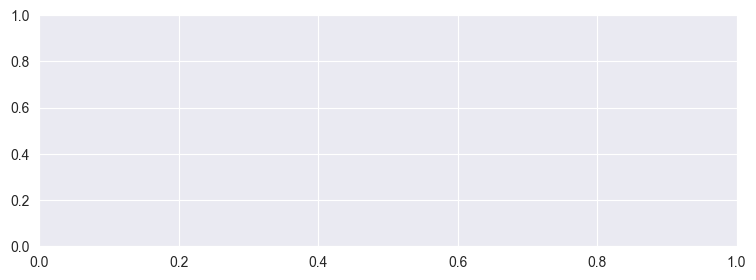

In [98]:
fig=plt.figure(figsize=(9,3))
ax = fig.add_subplot(111)
plt.plot(C_values, mean_train, label="train")
plt.plot(C_values, mean_val, label="validation")
plt.title("Logistic Regression")
plt.ylabel("mean accuracy")
plt.xlabel("C")
plt.xticks(C_values)
plt.legend();

### Distribution of song genres
There are too many classes (86) and not enough examples. Most classes have only 1 or 2 examples, while three classes have over 60 examples each. 

In [ ]:
y_all = train_set["top genre"]
value_counts=y_all.value_counts()
print("number of class names:", len(value_counts)) 

In [ ]:
if verbose:
    x=[x for x in range(1,87)]
    # full training set is very unbalanced, 
    # most genres have only 1 or 2 examples
    plt.figure(figsize=(20,3)) 
    value_counts.hist(bins=86); 
    plt.bar(x, value_counts.values);
    #plt.xticks(rotation=90);
    plt.xlabel('classes')
    plt.ylabel('count');
    plt.title('top genre')

In [ ]:
value_counts 

In [ ]:
if verbose:
  # Plot linear correlation matrix
  cm=train_set.iloc[:,3:14].corr()   # make sure indices are right!
  #cm[cm<0.45]=0

  fig, ax = plt.subplots(figsize=(9,3))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', vmin=-1,
  vmax=1, center=0, ax=ax)
  plt.title('Correlation Heatmap')
  plt.show()

### VIF

We calculated the variance inflation factor for each feature. The VIF is given by: **VIF = 1/(1-R^2)** where R^2 is the coefficient of determination. In general, if a feature that has a VIF value greater than 5 is considered to be highly collinear with other features in the data.  The output below shows that bpm and dnce are over 20!  We found that dropping dnce or bpm reduced classification accuracy. This was surprising and could be future work.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

num_data=train_set.iloc[:,4:14].copy()   # if this fails, the indices are wrong
VIF             = pd.DataFrame()
VIF['feature']  = num_data.columns
VIF['VIF']      = [variance_inflation_factor(num_data.values, i) for i in range(num_data.shape[1])]
VIF

### Boxplots show outliers
The more obvious outliers (> 3 std deviations) will be  removed in some cells below.

# 6. Saving the final prediction

In [ ]:
# save Kaggle predictions to csv file 
#
def save_y_pred(X_TEST_Id, y_pred_test, file_name):
  with open(file_name, 'w') as f:
    f.write("Id," + "top genre\n")
    for ii in range(113):
      f.write(str(X_TEST_Id[ii]) + ",")
      f.write(y_pred_test[ii]+"\n")
      #print(y_pred_test[ii])

TEST_Id= test_df.iloc[:,:1].values
TEST_Id=TEST_Id.flatten()
TEST_Id=list(TEST_Id)
y_test_pred=list(y_test_pred)
save_y_pred(TEST_Id, y_test_pred, file_name)